### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [1]:
# сделайте разделение изначального набора данных в этой ячейке

import pandas as pd
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100
pd.options.display.max_rows = 64

df = pd.read_csv('initial_data.csv')

features = df.drop(columns=['price']).columns.to_list()
target = ['price']

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.2,
    shuffle=False,
)

#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


In [2]:
# 2.1 Загрузка данных
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (85067, 15)
Размер тестовой выборки: (21267, 15)


In [3]:
# 2.2. Общий обзор датасета
df.shape

(106334, 16)

In [4]:
# первые пять строк
df.head(5)

,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,total_area,price
0,6220,1965,6,55.717113,37.781120,2.64,84,12,1,9,9.9,19.900000,1,0,35.099998,9500000
1,18012,2001,2,55.794849,37.608013,3.00,97,10,1,7,0.0,16.600000,1,0,43.000000,13500000
2,17821,2000,4,55.740040,37.761742,2.70,80,10,1,9,9.0,32.000000,2,0,56.000000,13500000
3,18579,2002,4,55.672016,37.570877,2.64,771,17,1,1,10.1,43.099998,3,0,76.000000,20000000
4,9293,1971,1,55.808807,37.707306,2.60,208,9,1,3,3.0,14.000000,1,0,24.000000,5200000


In [5]:
# последние пять строк
df.tail(5)

,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,total_area,price
106329,22455,2013,4,55.626579,37.313503,2.64,672,25,1,16,11.00,18.000000,1,0,42.000000,10500000
106330,3162,1960,1,55.727470,37.768677,2.48,80,5,0,5,5.28,28.330000,2,0,41.110001,7400000
106331,6513,1966,4,55.704315,37.506584,2.64,72,9,1,7,5.30,20.000000,1,0,31.500000,9700000
106332,23952,2017,4,55.699863,37.939564,2.70,480,25,1,15,13.80,33.700001,2,0,65.300003,11750000
106333,15104,1988,4,55.862133,37.689613,2.74,128,17,1,16,7.60,18.000000,1,0,38.000000,8000000


In [6]:
# 2.3 Анализ признаков для модели

In [7]:
df.describe()

,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,total_area,price
count,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,106334.000000,1.063340e+05
mean,13534.453270,1985.197444,3.450665,55.727660,37.600751,2.699060,250.949640,13.642391,0.897794,7.205597,8.180295,27.951637,1.969916,0.008097,52.865686,1.270701e+07
std,6586.751724,20.039228,1.423594,0.102790,0.147215,0.139411,198.158435,6.061194,0.302921,5.261938,3.154096,14.996188,0.824338,0.089619,17.380967,7.698140e+06
min,4.000000,1902.000000,0.000000,55.427238,37.190201,2.450000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,11.000000,1.500000e+03
25%,8370.000000,1969.000000,2.000000,55.648465,37.495724,2.640000,117.000000,9.000000,1.000000,3.000000,6.000000,19.000000,1.000000,0.000000,38.700001,8.650000e+06
50%,13344.500000,1981.000000,4.000000,55.717812,37.588785,2.640000,203.000000,14.000000,1.000000,6.000000,8.500000,28.900000,2.000000,0.000000,50.099998,1.100000e+07
75%,19265.000000,2004.000000,4.000000,55.811771,37.716290,2.740000,321.000000,17.000000,1.000000,10.000000,10.000000,37.500000,3.000000,0.000000,62.799999,1.450000e+07
max,24620.000000,2023.000000,6.000000,56.011032,37.946411,3.000000,4455.000000,99.000000,1.000000,46.000000,16.300000,74.000000,7.000000,1.000000,118.699997,7.000000e+08


In [8]:
print(df.isnull().sum().sort_values(ascending=False))

building_id          0
build_year           0
building_type_int    0
latitude             0
longitude            0
ceiling_height       0
flats_count          0
floors_total         0
has_elevator         0
floor                0
kitchen_area         0
living_area          0
rooms                0
is_apartment         0
total_area           0
price                0
dtype: int64


In [9]:
df.dtypes

building_id            int64
build_year             int64
building_type_int      int64
latitude             float64
longitude            float64
ceiling_height       float64
flats_count            int64
floors_total           int64
has_elevator           int64
floor                  int64
kitchen_area         float64
living_area          float64
rooms                  int64
is_apartment           int64
total_area           float64
price                  int64
dtype: object

In [10]:
unique_collection = {}
for col in df.columns:
    unique_num = len(df[col].unique())
    unique_collection[col] = unique_num

unique_collection = dict(sorted(unique_collection.items(), key=lambda x: x[1], reverse=True))
unique_collection

{'building_id': 21324,
 'latitude': 14576,
 'longitude': 14210,
 'price': 4681,
 'total_area': 1898,
 'living_area': 1434,
 'flats_count': 694,
 'kitchen_area': 579,
 'build_year': 115,
 'floors_total': 61,
 'floor': 46,
 'ceiling_height': 34,
 'rooms': 7,
 'building_type_int': 6,
 'has_elevator': 2,
 'is_apartment': 2}

In [11]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
ASSETS_DIR = "assets" 
if not os.path.exists(ASSETS_DIR):
    os.makedir(ASSETS_DIR)
sns.set_style("white")
sns.set_theme(style="whitegrid")

In [12]:
x = "building_id"

cat_columns = [
    "building_type_int",
    'rooms',
    'floor', 
    'floors_total',
    'flats_count'
]

binary_columns = ["is_apartment", 
                  "has_elevator"]

num_columns = ['ceiling_height', 
               'kitchen_area', 
               'living_area', 
               'total_area']

geo_columns = ['latitude', 
               'longitude']

stat = ["count"]

Text(0.5, 1.0, 'Count building_id by flats_count')

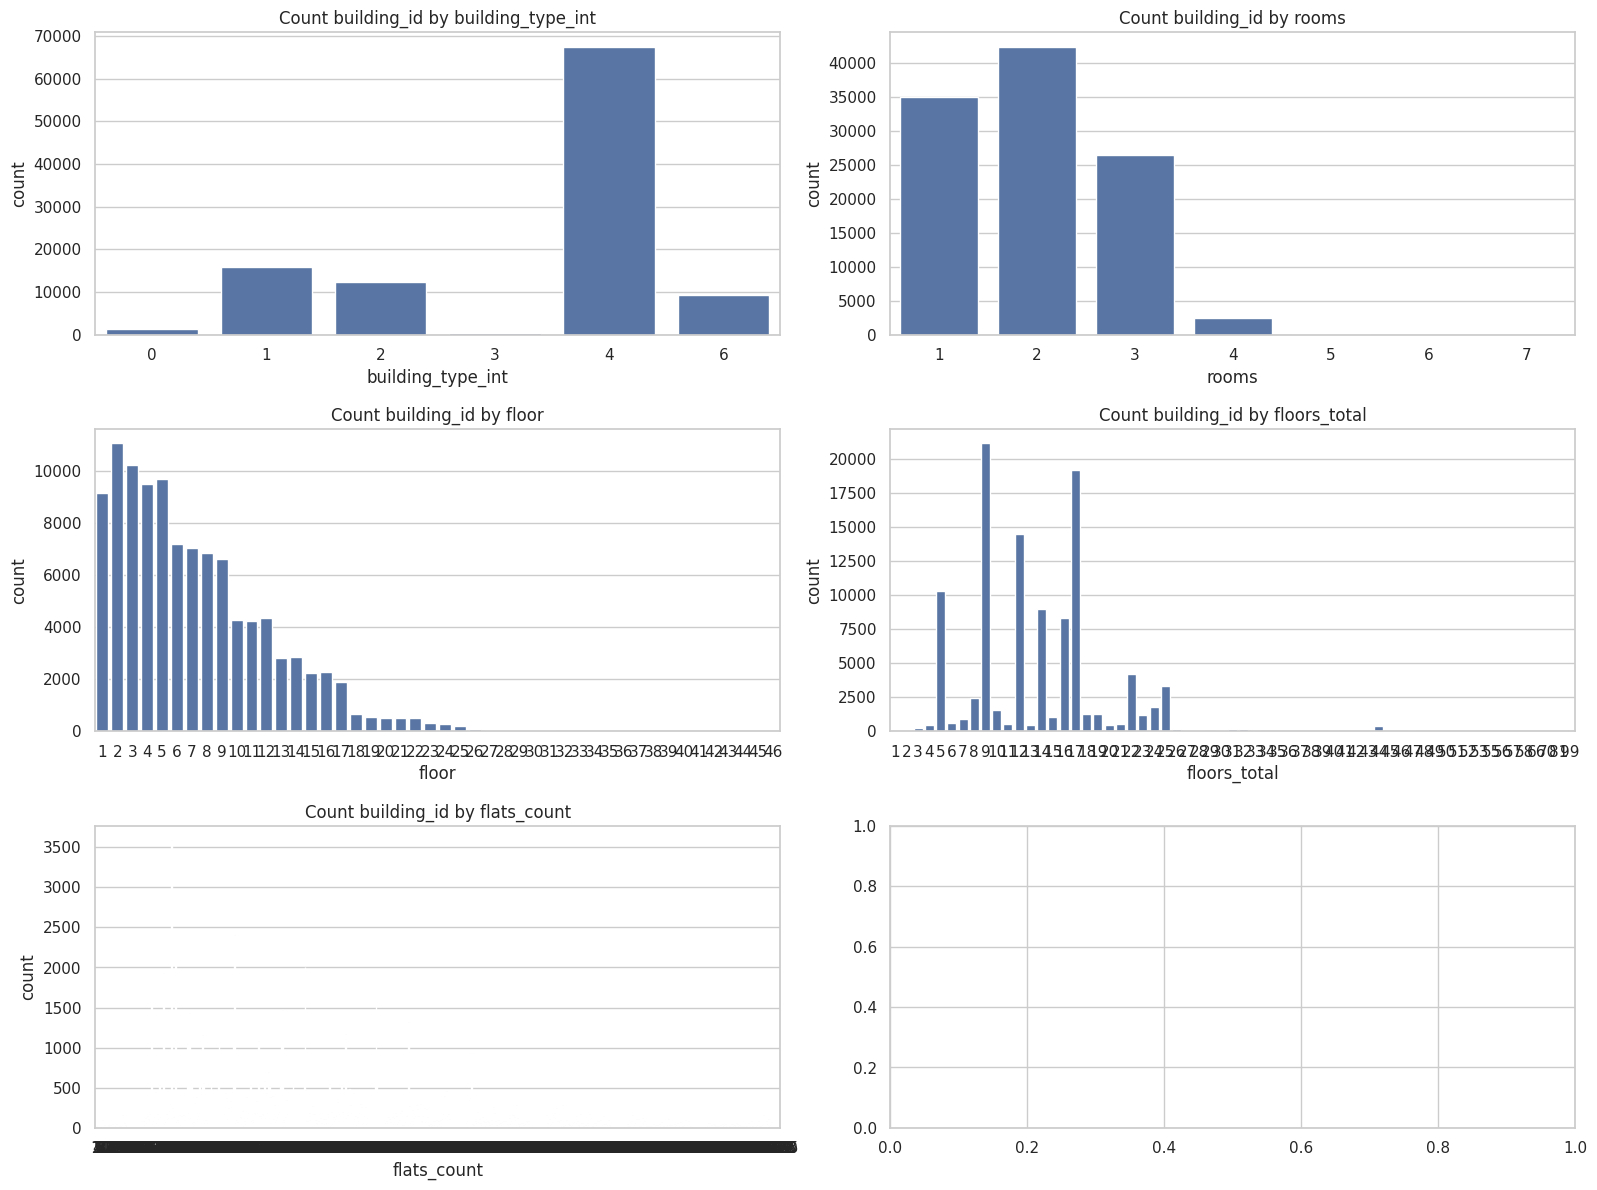

In [13]:
# график количества уникальных building_id в зависимости от фичей cat_columns (гистограммы):

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=3.6)

y = "building_id"

x = "building_type_int"
agg_df = pd.DataFrame(df.groupby(x).agg(stat)[y]).reset_index()
sns.barplot(
    data=agg_df,
    x=x,
    y=stat[0],
    ax=axs[0, 0]
)
axs[0, 0].set_title(f'Count {y} by {x}')

x = "rooms"
agg_df = pd.DataFrame(df.groupby(x).agg(stat)[y]).reset_index()
sns.barplot(
    data=agg_df,
    x=x,
    y=stat[0],
    ax=axs[0, 1]
)
axs[0, 1].set_title(f'Count {y} by {x}')

x = "floor"
agg_df = pd.DataFrame(df.groupby(x).agg(stat)[y]).reset_index()
sns.barplot(
    data=agg_df,
    x=x,
    y=stat[0],
    ax=axs[1, 0]
)
axs[1, 0].set_title(f'Count {y} by {x}')

x = "floors_total"
agg_df = pd.DataFrame(df.groupby(x).agg(stat)[y]).reset_index()
sns.barplot(
    data=agg_df,
    x=x,
    y=stat[0],
    ax=axs[1, 1]
)
axs[1, 1].set_title(f'Count {y} by {x}')

x = "flats_count"
agg_df = pd.DataFrame(df.groupby(x).agg(stat)[y]).reset_index()
sns.barplot(
    data=agg_df,
    x=x,
    y=stat[0],
    ax=axs[2, 0]
)
axs[2,0].set_title(f'Count {y} by {x}')

In [14]:
# таблица-воронка для бинарных колонок с подсчётом количества уникальных building_id
df.groupby(binary_columns).agg(stat[0])[x].reset_index().sort_values(
    by=x, ascending=False
).head(10)

,is_apartment,has_elevator,flats_count
1,0,1,94631
0,0,0,10842
3,1,1,835
2,1,0,26


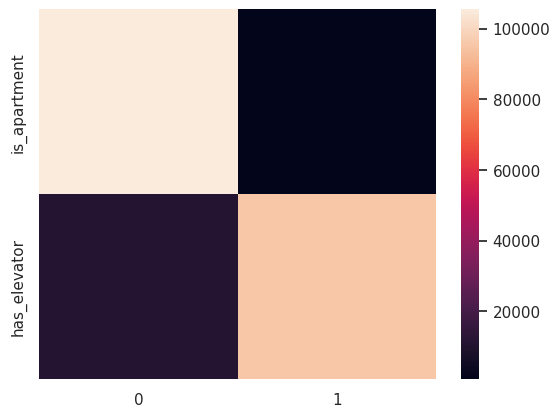

In [15]:
# тепловая карта бинарных признаков
heat_df = df[binary_columns].apply(pd.Series.value_counts).T
sns.heatmap(heat_df)
plt.savefig(os.path.join(ASSETS_DIR, 'cat_features_2_binary_heatmap'))

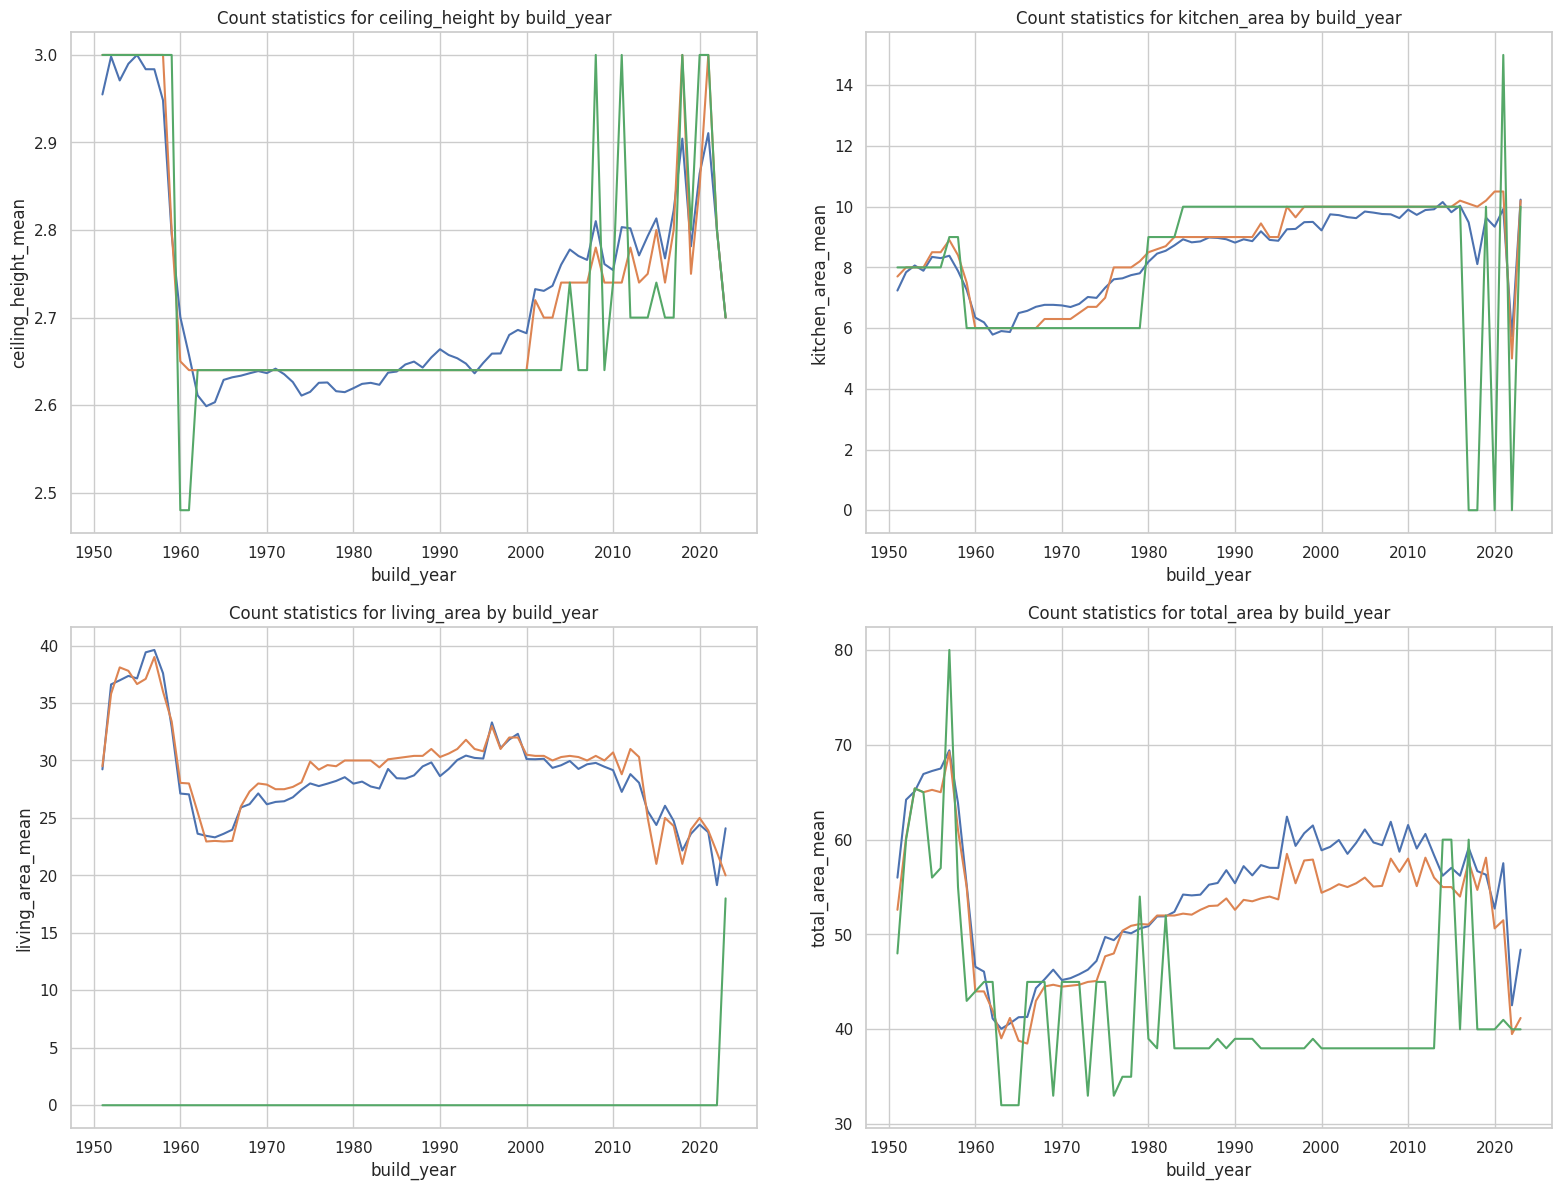

In [16]:
#  Числовые

x = "build_year"

num_columns = ['ceiling_height', 
               'kitchen_area', 
               'living_area', 
               'total_area']

stats = ["mean", "median", lambda x: x.mode().iloc[0]]

ceiling_height_agg = df[[x] + [num_columns[0]]].groupby([x]).agg(stats).reset_index()
ceiling_height_agg.columns = ceiling_height_agg.columns.droplevel()
ceiling_height_agg.columns = [x, "ceiling_height_mean", "ceiling_height_median", "ceiling_height_mode"]

kitchen_area_agg = df[[x] + [num_columns[1]]].groupby([x]).agg(stats).reset_index()
kitchen_area_agg.columns = kitchen_area_agg.columns.droplevel()
kitchen_area_agg.columns = [x, "kitchen_area_mean", "kitchen_area_median", "kitchen_area_mode"]

living_area_agg = df[[x] + [num_columns[2]]].groupby([x]).agg(stats).reset_index()
living_area_agg.columns = living_area_agg.columns.droplevel()
living_area_agg.columns = [x, "living_area_mean", "living_area_median", "living_area_mode"]

total_area_agg = df[[x] + [num_columns[3]]].groupby([x]).agg(stats).reset_index()
total_area_agg.columns = total_area_agg.columns.droplevel()
total_area_agg.columns = [x, "total_area_mean", "total_area_median", "total_area_mode"]

ceiling_height_agg = ceiling_height_agg[ceiling_height_agg["build_year"] > 1950].sort_values("build_year")
kitchen_area_agg = kitchen_area_agg[kitchen_area_agg["build_year"] > 1950].sort_values("build_year")
living_area_agg = living_area_agg[living_area_agg["build_year"] > 1950].sort_values("build_year")
total_area_agg = total_area_agg[total_area_agg["build_year"] > 1950].sort_values("build_year")

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=3.6)

# построение линейных графиков для ceiling_height
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_mean')
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y="ceiling_height_median")
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y="ceiling_height_mode")
axs[0,0].set_title(f"Count statistics for {num_columns[0]} by {x}")

# построение линейных графиков для kitchen_area
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_mean')
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y="kitchen_area_median")
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y="kitchen_area_mode")
axs[0,1].set_title(f"Count statistics for {num_columns[1]} by {x}")

# построение линейных графиков для living_area
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_mean')
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y="living_area_median")
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y="living_area_mode")
axs[1,0].set_title(f"Count statistics for {num_columns[2]} by {x}")

# построение линейных графиков для total_area
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_mean')
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y="total_area_median")
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y="total_area_mode")
axs[1,1].set_title(f"Count statistics for {num_columns[3]} by {x}")

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'areas_and_height_by_date'))

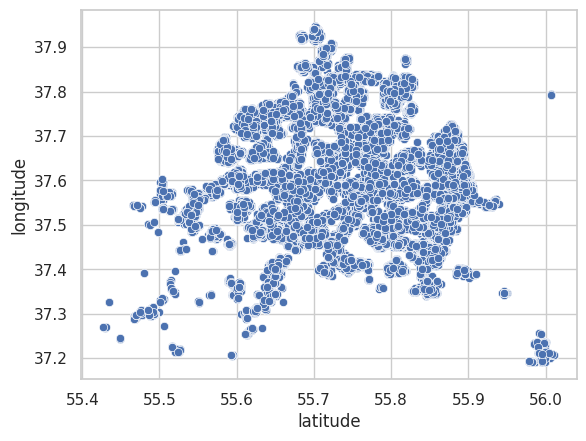

In [17]:
# geo_columns
sns.scatterplot(data=df, x="latitude", y="longitude")

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'geo'))

In [18]:
# 2.4 Анализ целевой переменной

,price
count,1.063340e+05
mean,1.270701e+07
std,7.698140e+06
min,1.500000e+03
25%,8.650000e+06
50%,1.100000e+07
75%,1.450000e+07
max,7.000000e+08


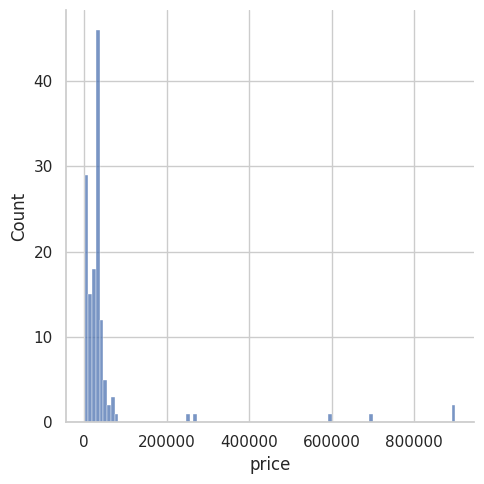

In [19]:
display(df[target].describe())

price = df[df["price"] < 1000000]["price"].dropna().astype(float)
sns.displot(price)

In [20]:
# 2.4 Анализ целевой переменной в зависимости от различных признаков

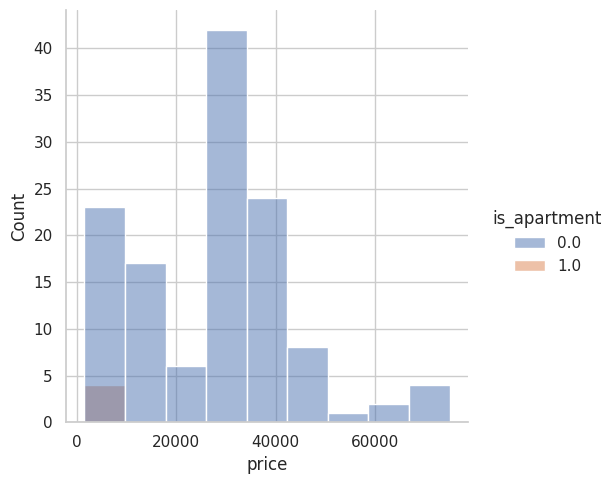

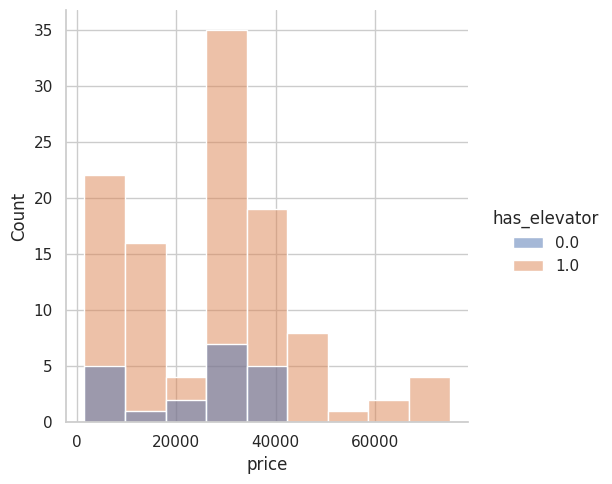

In [21]:
price = df[df["price"] < 100000][["price", binary_columns[0], binary_columns[1]]].dropna().astype(float)

sns.displot(price, x="price", hue=binary_columns[0])
plt.savefig(os.path.join(ASSETS_DIR, 'price_vs_is_apartment'))

sns.displot(price, x="price", hue=binary_columns[1])
plt.savefig(os.path.join(ASSETS_DIR, 'price_vs_has_elevator'))

In [22]:
# 2.5 Выводы после EDA

### EDA

Типы данных в датасете: INT и FLOAT. 

Данные уже были предобработаны в проекте первого спринта, пропущенных значений нет.

Были построены графики:

 - `cat_features_1.png`: количество зданий в разрезе фичей `building_type_int`, `rooms`, `floor`, `floors_total` и `flats_count`.
По графикам видно, что в данных преобладают здания 4-го типа с 1-2-3 комнатными помещениями. Типов 0 и 3 мало. Также есть немного зданий с 5-6-7 комнатами. 
Этажи в основном с 1 по 10. Также есть высокие, но в пределах реального.
Можем принять что, в этих фичах выбросов не наблюдается.
 - `cat_features_2_binary_heatmap.png`: визуальная оценка бинарных признаков.
В основном, среди объектов преобладают не-квартиры с лифтами. Возможно это - отели или бизнес-центры. Квартир очень мало.
Также, не будем считать их за выбросы.
 - `areas_and_height_by_date.png`: 
С годами растет высота потолков, но уменьшается площадь помещения.
 - `geo.png`:
Геолокации объектов сгруппированы в одной области - без сюрпризов.

Анализ целевой переменной:

Цены на объекты - в основном до 100000. Можно убрать из обучения данные выше этой цены. 
По корреляции с `has_elevator` нельзя сказать, что цена растет с наличием лифтов. Интересных корреляций не замечено.

In [23]:
# 2.6 логирование артефактов в MLflow

In [24]:
import os
import joblib
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "churn_marselkamilov_s2"
RUN_NAME = "EDA"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact(ASSETS_DIR)
    mlflow.log_artifact("project_template_sprint_2.ipynb")

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/pydantic/_internal/_fields.py:149: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:321: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


In [25]:
# 3.1 ручная генерация признаков

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    PolynomialFeatures,
    KBinsDiscretizer,
)

# Признаки для трансформаций
num_columns = ['ceiling_height', 
               'kitchen_area', 
               'living_area', 
               'total_area']

In [27]:
# 3.2 оборачивание всех преобразований в объекты sklearn

In [28]:
# Параметры для PolynomialFeatures и KBinsDiscretizer
degree = 3
n_bins = 5
encode = 'ordinal'
strategy = 'uniform'
subsample = None

numeric_transformer = ColumnTransformer(transformers=[('pol', PolynomialFeatures(degree=degree), num_columns), 
                                                      ('kbd', KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy, subsample=subsample), num_columns)])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_columns)], 
                                               n_jobs=-1)

In [29]:
encoded_features = preprocessor.fit_transform(X_train)
encoded_features_test = preprocessor.transform(X_test)

transformed_df = pd.DataFrame(
    encoded_features, 
    columns=preprocessor.get_feature_names_out()
)
transformed_df_test = pd.DataFrame(
    encoded_features_test, 
    columns=preprocessor.get_feature_names_out()
)

transformed_df.head(2)

,num__pol__1,num__pol__ceiling_height,num__pol__kitchen_area,num__pol__living_area,num__pol__total_area,num__pol__ceiling_height^2,num__pol__ceiling_height kitchen_area,num__pol__ceiling_height living_area,num__pol__ceiling_height total_area,num__pol__kitchen_area^2,num__pol__kitchen_area living_area,num__pol__kitchen_area total_area,num__pol__living_area^2,num__pol__living_area total_area,num__pol__total_area^2,num__pol__ceiling_height^3,num__pol__ceiling_height^2 kitchen_area,num__pol__ceiling_height^2 living_area,num__pol__ceiling_height^2 total_area,num__pol__ceiling_height kitchen_area^2,num__pol__ceiling_height kitchen_area living_area,num__pol__ceiling_height kitchen_area total_area,num__pol__ceiling_height living_area^2,num__pol__ceiling_height living_area total_area,num__pol__ceiling_height total_area^2,num__pol__kitchen_area^3,num__pol__kitchen_area^2 living_area,num__pol__kitchen_area^2 total_area,num__pol__kitchen_area living_area^2,num__pol__kitchen_area living_area total_area,num__pol__kitchen_area total_area^2,num__pol__living_area^3,num__pol__living_area^2 total_area,num__pol__living_area total_area^2,num__pol__total_area^3,num__kbd__ceiling_height,num__kbd__kitchen_area,num__kbd__living_area,num__kbd__total_area
0,1.0,2.64,9.9,19.9,35.099998,6.969601,26.136,52.536001,92.664,98.009992,197.009989,347.489972,396.009985,698.489956,1232.009893,18.399746,68.999043,138.695048,244.632969,258.74639,520.106391,917.373561,1045.466401,1844.013558,3252.506246,970.298888,1950.398812,3440.150585,3920.498699,6915.0503,12196.89747,7880.598547,13899.949863,24516.996398,43243.54536,1.0,3.0,1.0,1.0
1,1.0,3.00,0.0,16.6,43.000000,9.000000,0.000,49.800001,129.000,0.000000,0.000000,0.000000,275.560013,713.800016,1849.000000,27.000000,0.000000,149.400003,387.000000,0.00000,0.000000,0.000000,826.680038,2141.400049,5547.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,4574.296315,11849.080545,30693.400705,79507.00000,4.0,0.0,1.0,1.0


In [30]:
# 3.3 автоматическая генерация признаков

In [31]:
from autofeat import AutoFeatRegressor

# Список преобразований, которые произведем с признаками: взятие корня и подсчёт логарифма
transformations = ["sqrt", 'log']

# Определяется объект класса AutoFeatRegressor для задачи регрессии
# Выполняется один шаг генерации признаков
# Ограничение памяти — 16 Гб

af = AutoFeatRegressor(feateng_steps = 1,
                       max_gb = 16,
                       transformations = transformations)

# Применяется метод fit_trasform к обучающей выборке. На вход передаётся матрица признаков, а также значения целевых переменных
X_train_af = af.fit_transform(X_train, y_train)

# Чтобы преобразовать тестовый набор данных, вызывается только метод transform
X_test_af = af.transform(X_test)

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Собираем в единый датафрейм сгенерированные на обоих шагах признаки
X_train_features = pd.concat([transformed_df, X_train_af], axis=1)
X_test_features = pd.concat([transformed_df_test, X_test_af], axis=1)
X_train_features.head(2)

,num__pol__1,num__pol__ceiling_height,num__pol__kitchen_area,num__pol__living_area,num__pol__total_area,num__pol__ceiling_height^2,num__pol__ceiling_height kitchen_area,num__pol__ceiling_height living_area,num__pol__ceiling_height total_area,num__pol__kitchen_area^2,num__pol__kitchen_area living_area,num__pol__kitchen_area total_area,num__pol__living_area^2,num__pol__living_area total_area,num__pol__total_area^2,num__pol__ceiling_height^3,num__pol__ceiling_height^2 kitchen_area,num__pol__ceiling_height^2 living_area,num__pol__ceiling_height^2 total_area,num__pol__ceiling_height kitchen_area^2,num__pol__ceiling_height kitchen_area living_area,num__pol__ceiling_height kitchen_area total_area,num__pol__ceiling_height living_area^2,num__pol__ceiling_height living_area total_area,num__pol__ceiling_height total_area^2,num__pol__kitchen_area^3,num__pol__kitchen_area^2 living_area,num__pol__kitchen_area^2 total_area,num__pol__kitchen_area living_area^2,num__pol__kitchen_area living_area total_area,num__pol__kitchen_area total_area^2,num__pol__living_area^3,num__pol__living_area^2 total_area,num__pol__living_area total_area^2,num__pol__total_area^3,num__kbd__ceiling_height,num__kbd__kitchen_area,num__kbd__living_area,num__kbd__total_area,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,floor,kitchen_area,living_area,rooms,is_apartment,total_area,log(flats_count)
0,1.0,2.64,9.9,19.9,35.099998,6.969601,26.136,52.536001,92.664,98.009992,197.009989,347.489972,396.009985,698.489956,1232.009893,18.399746,68.999043,138.695048,244.632969,258.74639,520.106391,917.373561,1045.466401,1844.013558,3252.506246,970.298888,1950.398812,3440.150585,3920.498699,6915.0503,12196.89747,7880.598547,13899.949863,24516.996398,43243.54536,1.0,3.0,1.0,1.0,6220.0,1965.0,6.0,55.717113,37.781120,2.64,84.0,12.0,1.0,9.0,9.9,19.9,1.0,0.0,35.099998,4.430817
1,1.0,3.00,0.0,16.6,43.000000,9.000000,0.000,49.800001,129.000,0.000000,0.000000,0.000000,275.560013,713.800016,1849.000000,27.000000,0.000000,149.400003,387.000000,0.00000,0.000000,0.000000,826.680038,2141.400049,5547.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,4574.296315,11849.080545,30693.400705,79507.00000,4.0,0.0,1.0,1.0,18012.0,2001.0,2.0,55.794849,37.608013,3.00,97.0,10.0,1.0,7.0,0.0,16.6,1.0,0.0,43.000000,4.574711


In [33]:
# 3.4 обучение новой версии модели

In [34]:
from catboost import CatBoostRegressor

# Обучение модели CatBoostRegressor на полученных данных с дополнительными признаками
model = CatBoostRegressor(loss_function = 'RMSE')
model.fit(X_train_features,y_train)

Learning rate set to 0.082619
0:	learn: 7550767.6063320	total: 78.7ms	remaining: 1m 18s
1:	learn: 7316708.5578952	total: 107ms	remaining: 53.3s
2:	learn: 7111507.5133640	total: 135ms	remaining: 45s
3:	learn: 6946343.1348513	total: 164ms	remaining: 40.8s
4:	learn: 6788081.5404756	total: 192ms	remaining: 38.2s
5:	learn: 6642233.4187318	total: 221ms	remaining: 36.6s
6:	learn: 6530604.8238224	total: 250ms	remaining: 35.4s
7:	learn: 6423455.0996125	total: 280ms	remaining: 34.8s
8:	learn: 6338897.9889144	total: 311ms	remaining: 34.2s
9:	learn: 6258118.6192780	total: 339ms	remaining: 33.5s
10:	learn: 6186706.7869391	total: 369ms	remaining: 33.2s
11:	learn: 6115241.3111359	total: 410ms	remaining: 33.8s
12:	learn: 6056282.9645809	total: 494ms	remaining: 37.5s
13:	learn: 6007751.2074142	total: 551ms	remaining: 38.8s
14:	learn: 5960213.1704067	total: 608ms	remaining: 39.9s
15:	learn: 5917662.3472071	total: 670ms	remaining: 41.2s
16:	learn: 5880355.4484121	total: 727ms	remaining: 42s
17:	learn: 58

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Предсказания для тестового набора данных
probas = model.predict(X_test_features)

# Подсчет метрик (как у baseline модели)
metrics = {}

r2 = r2_score(y_test, probas)
neg_mse = mean_squared_error(y_test, probas)
neg_mape = mean_absolute_percentage_error(y_test, probas)

metrics["r2"] = r2
metrics["neg_mean_squared_error"] = neg_mse
metrics["neg_mean_absolute_percentage_error"] = neg_mape

metrics

{'r2': 0.5208583027976715,
 'neg_mean_squared_error': 25145852902848.383,
 'neg_mean_absolute_percentage_error': 2.1854386552953784}

In [36]:
# best_score
best_score = model.get_best_score()["learn"]
best_score

{'RMSE': 3542799.8035227344}

In [37]:
# 3.5 логирование артефактов в MLflow

In [38]:
# Логируем в новый ран с новым названием feature_generation
RUN_NAME = "feature_generation"

# Название модели project_model_generated_features
REGISTRY_MODEL_NAME = "project_model_generated_features"

# Настройки для логирования в MLFlow
pip_requirements = 'requirements.txt'
signature = mlflow.models.infer_signature(X_test_features, probas)
input_example = X_test_features[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    # логируем метрики, оценку модели и ноутбук
    mlflow.log_metrics(metrics) 
    mlflow.log_params(best_score)
    mlflow.log_artifact("project_template_sprint_2.ipynb")
    
    # логируем ColumnTransformer в папку column_tranformer и autofeat в папку autofeat
    preprocessor_info = mlflow.sklearn.log_model(preprocessor, artifact_path='column_tranformer')
    af_info = mlflow.sklearn.log_model(af, artifact_path='autofeat')

    # логируем обученную модель model в папку models
    model_info = mlflow.catboost.log_model(cb_model=model,
        artifact_path="models",
        signature=signature,
        input_example=input_example,
        registered_model_name=REGISTRY_MODEL_NAME,
        await_registration_for=60,
        pip_requirements=pip_requirements
		)

2024/11/04 21:23:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:16: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [39]:
# 4.1 Отбор признаков при помощи метода номер 1

In [41]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# cbr = CatBoostRegressor(loss_function = 'RMSE')

# backward feature selection

# Инициализация Sequential Feature Selector для backward feature selection
bfs = SequentialFeatureSelector(lr,
    k_features=6,       
    forward=False,      
    floating=False,     
    scoring='neg_mean_squared_error', 
    cv=2,               
    n_jobs=-1
)

# Обучение BFS на обучающем наборе
bfs = bfs.fit(X_train_features,y_train)

# Выбор признаков с помощью BFS
selected_features_bfs = bfs.k_feature_idx_

# Индексы отобранных признаков
selected_features_bfs

(4, 8, 18, 24, 40, 46)

In [42]:
# 4.2 Отбор признаков при помощи метода номер 2

# forward feature selection

# Инициализация Sequential Feature Selector для forward feature selection
ffs = SequentialFeatureSelector(lr,    
    k_features=6,       
    forward=True,      
    floating=False,     
    scoring='neg_mean_squared_error', 
    cv=2,               
    n_jobs=-1                
)

# Обучение FFS на обучающем наборе
ffs = ffs.fit(X_train_features,y_train)

# Выбор признаков с помощью FFS
selected_features_ffs = ffs.k_feature_idx_

# Индексы отобранных признаков
selected_features_ffs

(1, 8, 18, 40, 42, 46)

In [56]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

# Объединение индексов выбранных признаков из BFS и FFS для обучения
selected_features = sorted(list(set(selected_features_bfs + selected_features_ffs)))

# Названия отобранных признаков
selected_features_name = X_train_features.columns[selected_features]
selected_features_name

Index(['num__pol__ceiling_height', 'num__pol__total_area',
       'num__pol__ceiling_height total_area',
       'num__pol__ceiling_height^2 total_area',
       'num__pol__ceiling_height total_area^2', 'build_year', 'latitude',
       'floors_total'],
      dtype='object')

In [64]:
# Формируем новые наборы на основе отобранных признаков
X_train_features_selected = X_train_features[selected_features_name]
X_test_features_selected = X_test_features[selected_features_name]

In [65]:
# 4.4 Обучение новой версии модели

In [66]:
# Обучение модели CatBoostRegressor на данных с отобранными признаками
model_selected_features = CatBoostRegressor(loss_function = 'RMSE')
model_selected_features.fit(X_train_features_selected,y_train)

Learning rate set to 0.082619
0:	learn: 7557594.0796875	total: 13ms	remaining: 13s
1:	learn: 7343652.5964742	total: 25.8ms	remaining: 12.9s
2:	learn: 7158213.4643707	total: 36.9ms	remaining: 12.3s
3:	learn: 6993080.5853995	total: 47.5ms	remaining: 11.8s
4:	learn: 6853038.5981783	total: 58ms	remaining: 11.6s
5:	learn: 6725855.8653008	total: 69.4ms	remaining: 11.5s
6:	learn: 6621247.1303845	total: 80.3ms	remaining: 11.4s
7:	learn: 6524705.0731986	total: 91.2ms	remaining: 11.3s
8:	learn: 6441003.0872576	total: 102ms	remaining: 11.3s
9:	learn: 6359603.1075895	total: 112ms	remaining: 11.1s
10:	learn: 6297843.9737119	total: 123ms	remaining: 11s
11:	learn: 6241336.9581744	total: 133ms	remaining: 11s
12:	learn: 6190582.3590081	total: 145ms	remaining: 11s
13:	learn: 6143728.1836198	total: 155ms	remaining: 10.9s
14:	learn: 6104712.5831750	total: 166ms	remaining: 10.9s
15:	learn: 6072728.7410983	total: 175ms	remaining: 10.8s
16:	learn: 6042686.2070962	total: 185ms	remaining: 10.7s
17:	learn: 6009

In [67]:
# Предсказания для тестового набора данных
probas_selected_features = model_selected_features.predict(X_test_features_selected)

# Подсчет метрик
metrics_selected_features = {}

r2 = r2_score(y_test, probas_selected_features)
neg_mse = mean_squared_error(y_test, probas_selected_features)
neg_mape = mean_absolute_percentage_error(y_test, probas_selected_features)

metrics_selected_features["r2"] = r2
metrics_selected_features["neg_mean_squared_error"] = neg_mse
metrics_selected_features["neg_mean_absolute_percentage_error"] = neg_mape

metrics_selected_features

{'r2': 0.4984963846470525,
 'neg_mean_squared_error': 26319429545675.094,
 'neg_mean_absolute_percentage_error': 2.142078255254703}

In [68]:
# best_score
best_score_selected_features = model_selected_features.get_best_score()["learn"]
best_score_selected_features

{'RMSE': 4423347.878066129}

In [69]:
# 4.5 Логирование всех артефактов в MLflow

In [70]:
# Логируем в новый ран с новым названием feature_selection
RUN_NAME = "feature_selection"

# Название модели project_model_selected_features
REGISTRY_MODEL_NAME = "project_model_selected_features"

# настройки для логирования в MLFlow
pip_requirements = 'requirements.txt'
signature = mlflow.models.infer_signature(X_test_features_selected, probas_selected_features)
input_example = X_test_features_selected[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    # логируем метрики, оценку модели, нзвания отобранных признаков и ноутбук
    mlflow.log_metrics(metrics_selected_features) 
    mlflow.log_params(best_score_selected_features)
    mlflow.log_params({"selected_features":selected_features_name})
    mlflow.log_artifact("project_template_sprint_2.ipynb")
    
    # логируем обученную модель model_selected_features в папку models
    model_info = mlflow.catboost.log_model(cb_model=model_selected_features,
        artifact_path="models",
        signature=signature,
        input_example=input_example,
        registered_model_name=REGISTRY_MODEL_NAME,
        await_registration_for=60,
        pip_requirements=pip_requirements
		)

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:16: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Successfully registered model 'project_model_selected_features'.
2024/11/04 21:37:04 INFO mlflow.tracking._model_regi

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [71]:
# 5.1 Подбор гиперпарметров при мощи метода номер 1

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# Подбор гиперпараметров с помощью RandomizedSearchCV

model_rs = CatBoostRegressor(loss_function = 'RMSE')

parameters = {'depth'         : [6,8,10],
                'learning_rate' : [0.01, 0.05, 0.1],
                'iterations'    : [30, 50, 100]
                }

rs = RandomizedSearchCV(model_rs, 
                  parameters, 
                  cv=2, 
                  n_jobs=-1, 
                  verbose = False)

rsf = rs.fit(X_train_features_selected, y_train)

0:	learn: 8530103.2044523	total: 65ms	remaining: 6.43s
0:	learn: 6638964.9921149	total: 62.8ms	remaining: 6.21s
1:	learn: 6485524.4469998	total: 80.4ms	remaining: 3.94s
1:	learn: 8383622.7597946	total: 83.8ms	remaining: 4.11s
2:	learn: 6346288.3553860	total: 101ms	remaining: 3.27s
2:	learn: 8255412.8786054	total: 105ms	remaining: 3.38s
3:	learn: 6216100.2442876	total: 120ms	remaining: 2.88s
3:	learn: 8136736.7818106	total: 124ms	remaining: 2.98s
4:	learn: 8027182.4346195	total: 140ms	remaining: 2.67s
4:	learn: 6093494.6959546	total: 143ms	remaining: 2.71s
5:	learn: 5974366.6426359	total: 159ms	remaining: 2.49s
5:	learn: 7925713.1854046	total: 160ms	remaining: 2.51s
6:	learn: 5869655.7090852	total: 179ms	remaining: 2.38s
6:	learn: 7835084.0069341	total: 181ms	remaining: 2.4s
7:	learn: 7746865.6005295	total: 198ms	remaining: 2.28s
7:	learn: 5769049.7814840	total: 215ms	remaining: 2.47s
8:	learn: 7669831.2073951	total: 220ms	remaining: 2.23s
8:	learn: 5683321.9428875	total: 238ms	remainin

In [73]:
# лучшие параметры и оценка точности RandomizedSearchCV
print("Лучшие гиперпараметры:", rsf.best_params_)
print("Лучший счет:", rsf.best_score_)

Лучшие гиперпараметры: {'learning_rate': 0.05, 'iterations': 100, 'depth': 10}
Лучший счет: 0.49295214208380606


In [74]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2

In [75]:
# Подбор гиперпараметров с помощью GridSearchCV

model_gs = CatBoostRegressor(loss_function = 'RMSE')

# сетка гиперпараметров
parameters = {'depth'         : [6,8,10],
                'learning_rate' : [0.01, 0.05, 0.1],
                'iterations'    : [30, 50, 100]
                }

gs = GridSearchCV(model_gs, 
                  parameters, 
                  cv=2, 
                  n_jobs=-1, 
                  verbose = False)

gsf = gs.fit(X_train_features_selected, y_train)

0:	learn: 6768294.7957665	total: 19.9ms	remaining: 578ms
0:	learn: 8651100.3002797	total: 11.6ms	remaining: 337ms
1:	learn: 6737284.9562102	total: 35.7ms	remaining: 500ms
2:	learn: 6705883.9816219	total: 49.4ms	remaining: 445ms
3:	learn: 6675919.3499384	total: 66.3ms	remaining: 431ms
1:	learn: 8621924.0448193	total: 32.8ms	remaining: 460ms
4:	learn: 6646289.9224850	total: 84.1ms	remaining: 421ms
2:	learn: 8593522.3371361	total: 54.4ms	remaining: 489ms
5:	learn: 6617403.8816245	total: 101ms	remaining: 405ms
3:	learn: 8566104.8622855	total: 70.2ms	remaining: 456ms
6:	learn: 6589179.0091013	total: 121ms	remaining: 398ms
4:	learn: 8538852.2193340	total: 88.7ms	remaining: 444ms
7:	learn: 6560917.5328175	total: 137ms	remaining: 376ms
5:	learn: 8511952.8707606	total: 102ms	remaining: 410ms
8:	learn: 6533105.3032557	total: 153ms	remaining: 358ms
6:	learn: 8484735.3017830	total: 118ms	remaining: 388ms
9:	learn: 6505546.6505128	total: 167ms	remaining: 335ms
7:	learn: 8458420.6154557	total: 134ms

In [76]:
# лучшие параметры и оценка точности GridSearchCV
print("Лучшие гиперпараметры:", gsf.best_params_)
print("Лучший счет:", gsf.best_score_)

Лучшие гиперпараметры: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Лучший счет: 0.5036546219249086


In [ ]:
# 5.3 Формирование списка гиперпараметров для новой модели

In [77]:
best_params = rsf.best_params_

In [78]:
# 5.4 Обучение финальной версии модели

In [79]:
# Обучение модели CatBoostRegressor на данных с отобранными признаками и лучшими гиперпараметрами
model_selected_features_hp = CatBoostRegressor(loss_function = 'RMSE', **best_params)
model_selected_features_hp.fit(X_train_features_selected,y_train)

0:	learn: 7645797.4158595	total: 40.2ms	remaining: 3.98s
1:	learn: 7493286.5285393	total: 74.7ms	remaining: 3.66s
2:	learn: 7356025.3794405	total: 107ms	remaining: 3.47s
3:	learn: 7230578.2339967	total: 142ms	remaining: 3.41s
4:	learn: 7112395.3685786	total: 174ms	remaining: 3.31s
5:	learn: 7003943.9980510	total: 209ms	remaining: 3.28s
6:	learn: 6902924.0677201	total: 246ms	remaining: 3.26s
7:	learn: 6806810.3168515	total: 280ms	remaining: 3.21s
8:	learn: 6720305.1092572	total: 316ms	remaining: 3.19s
9:	learn: 6641153.5957543	total: 349ms	remaining: 3.14s
10:	learn: 6567550.1394303	total: 387ms	remaining: 3.13s
11:	learn: 6498816.6650353	total: 419ms	remaining: 3.08s
12:	learn: 6432233.4294165	total: 453ms	remaining: 3.03s
13:	learn: 6374788.0070061	total: 484ms	remaining: 2.97s
14:	learn: 6322879.0185222	total: 515ms	remaining: 2.92s
15:	learn: 6270697.3002080	total: 547ms	remaining: 2.87s
16:	learn: 6225174.2784021	total: 578ms	remaining: 2.82s
17:	learn: 6182265.5862634	total: 609ms

In [80]:
# Предсказания для тестового набора данных
probas_selected_features_hp = model_selected_features_hp.predict(X_test_features_selected)

# Подсчет метрик
metrics_selected_features_hp = {}

r2 = r2_score(y_test, probas_selected_features_hp)
neg_mse = mean_squared_error(y_test, probas_selected_features_hp)
neg_mape = mean_absolute_percentage_error(y_test, probas_selected_features_hp)

metrics_selected_features_hp["r2"] = r2
metrics_selected_features_hp["neg_mean_squared_error"] = neg_mse
metrics_selected_features_hp["neg_mean_absolute_percentage_error"] = neg_mape

metrics_selected_features_hp

{'r2': 0.5669338119111231,
 'neg_mean_squared_error': 22727762426991.81,
 'neg_mean_absolute_percentage_error': 2.189470240447422}

In [81]:
# best_score
best_score_selected_features_hp = model_selected_features_hp.get_best_score()["learn"]
best_score_selected_features_hp

{'RMSE': 5441629.885825642}

In [82]:
# 5.5 Логирование артефактов в MLflow

In [83]:
# Логируем в новый ран с новым названием hyper_params_serching
RUN_NAME = "hyper_params_serching"

# Название модели project_model_selected_features_hp
REGISTRY_MODEL_NAME = "project_model_selected_features_hp"

# настройки для логирования в MLFlow
pip_requirements = 'requirements.txt'
signature = mlflow.models.infer_signature(X_test_features_selected, probas_selected_features_hp)
input_example = X_test_features_selected[:10]

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    # логируем метрики, оценку модели и ноутбук
    mlflow.log_metrics(metrics_selected_features_hp) 
    mlflow.log_params(best_score_selected_features_hp)
    mlflow.log_artifact("project_template_sprint_2.ipynb")
    
    # логируем обученную модель model_selected_features_hp в папку models
    model_info = mlflow.catboost.log_model(cb_model=model_selected_features_hp,
        artifact_path="models",
        signature=signature,
        input_example=input_example,
        registered_model_name=REGISTRY_MODEL_NAME,
        await_registration_for=60,
        pip_requirements=pip_requirements
		)

/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:16: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/mle-user/mle_projects/.venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Successfully registered model 'project_model_selected_features_hp'.
2024/11/04 21:39:17 INFO mlflow.tracking._model_r